In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
#import training set
df = pd.read_csv('/Users/Nathan/Springboard/dota2.training.data.csv')

df.head()

,match_id,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,...,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,dire_total_gold,dire_total_xp,dire_total_kills,dire_total_deaths,radiant_win
0,1,44,1,1448,1163,14,0,0,7,97,...,0,2,0,0,NaN,4348,6419,0,0,1
1,2,77,1,1311,1809,31,0,0,6,47,...,2,1,3,2,-9.0,3989,5115,0,2,0
2,3,66,2,1477,1367,25,0,0,7,22,...,4,2,2,0,18.0,5096,6007,1,1,1
3,4,5,0,697,807,8,0,0,10,53,...,3,1,0,0,NaN,4907,5937,1,1,0
4,5,102,1,962,1087,11,0,0,6,98,...,2,4,1,0,NaN,5471,5931,2,1,0


In [3]:
#print column names
for col in df.columns:
    print(col)

match_id
r1_hero
r1_level
r1_xp
r1_gold
r1_lh
r1_kills
r1_deaths
r1_items
r2_hero
r2_level
r2_xp
r2_gold
r2_lh
r2_kills
r2_deaths
r2_items
r3_hero
r3_level
r3_xp
r3_gold
r3_lh
r3_kills
r3_deaths
r3_items
r4_hero
r4_level
r4_xp
r4_gold
r4_lh
r4_kills
r4_deaths
r4_items
r5_hero
r5_level
r5_xp
r5_gold
r5_lh
r5_kills
r5_deaths
r5_items
d1_hero
d1_level
d1_xp
d1_gold
d1_lh
d1_kills
d1_deaths
d1_items
d2_hero
d2_level
d2_xp
d2_gold
d2_lh
d2_kills
d2_deaths
d2_items
d3_hero
d3_level
d3_xp
d3_gold
d3_lh
d3_kills
d3_deaths
d3_items
d4_hero
d4_level
d4_xp
d4_gold
d4_lh
d4_kills
d4_deaths
d4_items
d5_hero
d5_level
d5_xp
d5_gold
d5_lh
d5_kills
d5_deaths
d5_items
first_blood_time
first_blood_team
first_blood_player1
first_blood_player2
radiant_bottle_time
radiant_courier_time
radiant_flying_courier_time
radiant_tpscroll_count
radiant_boots_count
radiant_ward_observer_count
radiant_ward_sentry_count
radiant_first_ward_time
radiant_total_gold
radiant_total_xp
radiant_total_kills
radiant_total_deaths


In [4]:
#load in heroes JSON file and convert to df
j = json.load((open('/Users/Nathan/Springboard/hero_names.json')))

heroes_df = pd.read_json('/Users/Nathan/Springboard/hero_names.json')

heroes_df.head()

,npc_dota_hero_antimage,npc_dota_hero_axe,npc_dota_hero_bane,npc_dota_hero_bloodseeker,npc_dota_hero_crystal_maiden,npc_dota_hero_drow_ranger,npc_dota_hero_earthshaker,npc_dota_hero_juggernaut,npc_dota_hero_mirana,npc_dota_hero_morphling,...,npc_dota_hero_terrorblade,npc_dota_hero_phoenix,npc_dota_hero_oracle,npc_dota_hero_winter_wyvern,npc_dota_hero_arc_warden,npc_dota_hero_monkey_king,npc_dota_hero_dark_willow,npc_dota_hero_pangolier,npc_dota_hero_grimstroke,npc_dota_hero_mars
agi_gain,3.2,2.2,2.6,3.5,1.6,2.8,1.4,2.8,3.7,4.3,...,4.8,1.3,1.7,1.9,2.4,3.7,1.6,3.2,1.9,1.9
attack_range,150,150,400,150,600,625,150,150,630,350,...,150,500,620,425,625,300,475,150,550,250
attack_rate,1.4,1.7,1.7,1.7,1.7,1.7,1.7,1.4,1.7,1.5,...,1.5,1.7,1.4,1.7,1.7,1.7,1.3,1.7,1.7,1.8
attack_type,Melee,Melee,Ranged,Melee,Ranged,Ranged,Melee,Melee,Ranged,Ranged,...,Melee,Ranged,Ranged,Ranged,Ranged,Melee,Ranged,Melee,Ranged,Melee
base_agi,24,20,23,24,16,29,12,36,18,24,...,22,12,15,16,15,22,18,18,18,20


In [5]:
#transpose heroes df shape so that each row represents a single hero
hero_df = heroes_df.transpose()

hero_df.head()

,agi_gain,attack_range,attack_rate,attack_type,base_agi,base_armor,base_attack_max,base_attack_min,base_health,base_health_regen,...,int_gain,legs,localized_name,move_speed,name,primary_attr,projectile_speed,roles,str_gain,turn_rate
npc_dota_hero_antimage,3.2,150,1.4,Melee,24,-1,33,29,200,0.25,...,1.8,2,Anti-Mage,310,npc_dota_hero_antimage,agi,0,"[Carry, Escape, Nuker]",1.3,0.5
npc_dota_hero_axe,2.2,150,1.7,Melee,20,-2,28,24,200,2.75,...,1.6,2,Axe,295,npc_dota_hero_axe,str,900,"[Initiator, Durable, Disabler, Jungler]",3.4,0.6
npc_dota_hero_bane,2.6,400,1.7,Ranged,23,1,41,35,200,None,...,2.6,4,Bane,305,npc_dota_hero_bane,int,900,"[Support, Disabler, Nuker, Durable]",2.6,0.6
npc_dota_hero_bloodseeker,3.5,150,1.7,Melee,24,0,39,33,200,None,...,1.7,2,Bloodseeker,295,npc_dota_hero_bloodseeker,agi,900,"[Carry, Disabler, Jungler, Nuker, Initiator]",2.7,0.5
npc_dota_hero_crystal_maiden,1.6,600,1.7,Ranged,16,0,36,30,200,None,...,3.3,2,Crystal Maiden,275,npc_dota_hero_crystal_maiden,int,900,"[Support, Disabler, Nuker, Jungler]",2.2,0.5


In [6]:
#placeholder definition as variations of this will be used often
all_heroes = df[['r1_hero', 'r2_hero','r3_hero','r4_hero','r5_hero','d1_hero','d2_hero','d3_hero','d4_hero','d5_hero']]

In [7]:
#calculate radiant team hero frequency
r_heroes = df[['r1_hero', 'r2_hero','r3_hero','r4_hero','r5_hero']]

r_hero_freq = r_heroes.apply(pd.value_counts).sum(axis=1,skipna = True)

r_hero_freq.head()

1    13526
2    10680
3     5932
4     7153
5    14123
dtype: int64

In [8]:
#radiant team hero frequency with win
r_heroes_with_win = df[['r1_hero', 'r2_hero','r3_hero','r4_hero','r5_hero','radiant_win']]

r_heroes_win_only = r_heroes_with_win[r_heroes_with_win['radiant_win'] > 0]

r_heroes_win_only = r_heroes_win_only.drop(columns='radiant_win').apply(pd.value_counts).sum(axis=1,skipna = True)

r_heroes_win_only.head()

1    6736
2    4981
3    2881
4    3329
5    7922
dtype: int64

In [9]:
#radiant team hero win rate
r_heroes_win_per = r_heroes_win_only.divide(r_hero_freq)

In [10]:
#calculate dire team hero frequency
d_heroes = df[['d1_hero','d2_hero','d3_hero','d4_hero','d5_hero']]
d_hero_freq = d_heroes.apply(pd.value_counts).sum(axis=1,skipna = True)
d_hero_freq.head()

1    13864
2    10565
3     6099
4     7050
5    14061
dtype: int64

In [11]:
#dire team hero frequency with win
d_heroes_with_win = df[['d1_hero','d2_hero','d3_hero','d4_hero','d5_hero','radiant_win']]

d_heroes_win_only = d_heroes_with_win[d_heroes_with_win['radiant_win'] == 0]

d_heroes_win_only = d_heroes_win_only.drop(columns='radiant_win').apply(pd.value_counts).sum(axis=1,skipna = True)

d_heroes_win_only.head()

1    6459
2    4674
3    2836
4    3075
5    7441
dtype: int64

In [12]:
#dire team hero win rate
d_heroes_win_per = d_heroes_win_only.divide(d_hero_freq)

In [13]:
d_heroes_win_per.head()

1    0.465883
2    0.442404
3    0.464994
4    0.436170
5    0.529194
dtype: float64

In [14]:
r_heroes_win_per.head()

1    0.498004
2    0.466386
3    0.485671
4    0.465399
5    0.560929
dtype: float64

In [15]:
#average radiant and dire team hero win rates for all hero win rate
all_heroes_win_per = ((d_heroes_win_per + r_heroes_win_per)/2)*100

sorted_hero_win_rates = all_heroes_win_per.sort_values(ascending=False)
sorted_hero_win_rates.head()

57     59.731539
67     58.812932
102    58.549115
42     57.560472
36     57.212145
dtype: float64

In [16]:
#radiant team win rate
df['radiant_win'].mean()

0.5117442990984621

In [17]:
#mean total gold by radiant teams with win
r_gold_win = df[['radiant_total_gold','radiant_win' ]]


radiant_mean_gold_if_win = r_gold_win[r_gold_win['radiant_win'] ==1].mean()

radiant_mean_gold_if_lose = r_gold_win[r_gold_win['radiant_win'] == 0].mean()

In [18]:
#mean total gold by dire teams with win
d_gold_win = df[['dire_total_gold','radiant_win' ]]

dire_mean_gold_if_win = d_gold_win[d_gold_win['radiant_win'] ==0].mean()

dire_mean_gold_if_lose = d_gold_win[d_gold_win['radiant_win'] ==1].mean()

In [19]:
mean_gold_if_win = (radiant_mean_gold_if_win[0] + dire_mean_gold_if_win[0])/2
mean_gold_if_win

5657.015217922237

In [20]:
mean_gold_if_lose = (radiant_mean_gold_if_lose[0] + dire_mean_gold_if_lose[0])/2
mean_gold_if_lose

5361.932958443441

In [21]:
#mean total xp by radiant teams with win
r_xp_win = df[['radiant_total_xp','radiant_win' ]]
radiant_mean_xp_if_win = r_xp_win[r_xp_win['radiant_win'] == 1].mean()
radiant_mean_xp_if_lose = r_xp_win[r_xp_win['radiant_win'] == 0].mean()

In [22]:
#mean total gold by dire teams with win
d_xp_win = df[['dire_total_xp','radiant_win' ]]
dire_mean_xp_if_win = d_xp_win[d_xp_win['radiant_win'] == 0].mean()
dire_mean_xp_if_lose = d_xp_win[d_xp_win['radiant_win'] == 1].mean()

In [23]:
mean_xp_if_win = (radiant_mean_xp_if_win[0] + dire_mean_xp_if_win[0])/2
mean_xp_if_win

6358.5066970796925

In [24]:
mean_xp_if_lose = (radiant_mean_xp_if_lose[0] + dire_mean_xp_if_lose[0])/2
mean_xp_if_lose

6146.367340016961

In [25]:
#mean total items by radiant teams with win
r_items_win = df[['r1_items','r2_items','r3_items','r4_items','r5_items','radiant_win']]
radiant_mean_items_if_win = r_items_win[r_items_win['radiant_win'] == 1].mean()
radiant_mean_items_if_lose = r_items_win[r_items_win['radiant_win'] == 0].mean()

In [26]:
#mean total items by dire teams with win
d_items_win = df[['d1_items','d2_items','d3_items','d4_items','d5_items','radiant_win']]
dire_mean_items_if_win = d_items_win[d_items_win['radiant_win'] == 0].mean()
dire_mean_items_if_lose = d_items_win[d_items_win['radiant_win'] == 1].mean()

In [27]:
mean_items_if_win = (radiant_mean_items_if_win[0] + dire_mean_items_if_win[0])/2
mean_items_if_win

7.756156597911167

In [28]:
mean_items_if_lose = (radiant_mean_items_if_lose[0] + dire_mean_items_if_lose[0])/2
mean_items_if_lose

7.549559562842598

In [29]:
#slice radiant time at first bottle item purchase with win, drop na to subset matches with radiant bottle purchase only
r_bottle = df[['radiant_bottle_time', 'radiant_win']].dropna()

In [30]:
#mean time of radiant bottle purchase with win vs. loss
r_bottle.groupby(['radiant_win']).mean()

,radiant_bottle_time
radiant_win,
0,118.047764
1,114.345904


In [31]:
#count of matches won by radiant team with bottle purchase
r_bottle_win = r_bottle.groupby(['radiant_win']).size()
r_bottle_win

radiant_win
0    64275
1    67802
dtype: int64

In [32]:
#radiant win rate with bottle item
r_bottle_win_per = r_bottle_win[1] / (r_bottle_win[0] + r_bottle_win[1])
r_bottle_win_per

0.5133520597833082

In [33]:
#slice dire time at first bottle item purchase with win, drop na to subset matches with dire bottle purchase only
d_bottle = df[['dire_bottle_time', 'radiant_win']].dropna()

In [34]:
#mean time of dire bottle purchase with win vs. loss
d_bottle.groupby(['radiant_win']).mean()

,dire_bottle_time
radiant_win,
0,115.298575
1,117.918082


In [35]:
#count of matches won by dire team with bottle purchase
d_bottle_win = d_bottle.groupby(['radiant_win']).size()
d_bottle_win

radiant_win
0    64627
1    66982
dtype: int64

In [36]:
#dire win rate with bottle item
d_bottle_win_per = d_bottle_win[0] / (d_bottle_win[0] + d_bottle_win[1])
d_bottle_win_per

0.49105304348486806

In [37]:
#overall bottle item win rate
bottle_win_per = (r_bottle_win_per + d_bottle_win_per)/2
bottle_win_per

0.5022025516340881

In [38]:
#slice radiant time at first courier item purchase with win, drop na to subset matches with radiant courier purchase only
r_courier = df[['radiant_courier_time', 'radiant_win']].dropna()
r_no_courier = df[['radiant_courier_time', 'radiant_win']]
r_courier.groupby(['radiant_win']).mean()

,radiant_courier_time
radiant_win,
0,-52.473356
1,-55.737009


In [39]:
r_no_courier["radiant_courier_time"][~r_no_courier["radiant_courier_time"].isna()]=-1
r_no_courier.fillna(1,inplace=True)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
//anaconda

In [40]:
r_no_courier.groupby(['radiant_win']).mean()

,radiant_courier_time
radiant_win,
0,-0.925282
1,-0.934411


In [41]:
#count of matches won by radiant team with courier purchase
r_courier_win = r_courier.groupby(['radiant_win']).size()
r_courier_win

radiant_win
0    85084
1    89600
dtype: int64

In [42]:
#radiant win rate with courier item
r_courier_win_per = r_courier_win[1] / (r_courier_win[0] + r_courier_win[1])
r_courier_win_per

0.512926198163541

In [43]:
#slice dire time at first courier item purchase with win, drop na to subset matches with dire courier purchase only
d_courier = df[['dire_courier_time', 'radiant_win']].dropna()
d_courier.groupby(['radiant_win']).mean()

,dire_courier_time
radiant_win,
0,-56.112380
1,-52.643638


In [44]:
#count of matches won by dire team with courier purchase
d_courier_win = d_courier.groupby(['radiant_win']).size()
d_courier_win

radiant_win
0    85567
1    89308
dtype: int64

In [45]:
#dire win rate with courier item
d_courier_win_per = d_courier_win[0] / (d_courier_win[0] + d_courier_win[1])
d_courier_win_per

0.4893037884203002

In [46]:
#overall courier item win rate
courier_win_per = (r_courier_win_per + d_courier_win_per)/2
courier_win_per

0.5011149932919206

In [47]:
#slice radiant time at first flying courier item purchase with win, drop na to subset matches with radiant flying courier purchase only
r_fcourier = df[['radiant_flying_courier_time', 'radiant_win']].dropna()
r_fcourier.groupby(['radiant_win']).mean()

,radiant_flying_courier_time
radiant_win,
0,223.59853
1,222.45330


In [48]:
#count of matches won by radiant team with flying courier purchase
r_fcourier_win = r_fcourier.groupby(['radiant_win']).size()
r_fcourier_win

radiant_win
0    39318
1    46124
dtype: int64

In [49]:
#radiant win rate with flying courier item
r_fcourier_win_per = r_fcourier_win[1] / (r_fcourier_win[0] + r_fcourier_win[1])*100
r_fcourier_win_per

53.98281875424264

In [50]:
#slice dire time at first flying courier item purchase with win, drop na to subset matches with dire flying courier purchase only
d_fcourier = df[['dire_flying_courier_time', 'radiant_win']].dropna()
d_fcourier.groupby(['radiant_win']).mean()

,dire_flying_courier_time
radiant_win,
0,221.671488
1,222.465330


In [51]:
#count of matches won by dire team with flying courier purchase
d_fcourier_win = d_fcourier.groupby(['radiant_win']).size()
d_fcourier_win

radiant_win
0    46187
1    43107
dtype: int64

In [52]:
#dire win rate with flying courier item
d_fcourier_win_per = d_fcourier_win[0] / (d_fcourier_win[0] + d_fcourier_win[1])*100
d_fcourier_win_per

51.72463995341232

In [53]:
#overall flying courier item win rate
fcourier_win_per = (r_fcourier_win_per + d_fcourier_win_per)/2
fcourier_win_per

52.85372935382748

In [54]:
#slice radiant time at first tpscroll item purchase with win, drop na to subset matches with radiant tpscroll purchase only
r_scroll = df[['radiant_tpscroll_count', 'radiant_win']].dropna()
r_scroll.groupby(['radiant_win']).mean()

,radiant_tpscroll_count
radiant_win,
0,2.895255
1,2.622887


In [55]:
#count of matches won by radiant team with tpscroll purchase
r_scroll_win = r_scroll.groupby(['radiant_win']).size()
r_scroll_win

radiant_win
0    88386
1    92638
dtype: int64

In [56]:
#radiant win rate with tpscroll item
r_scroll_win_per = r_scroll_win[1] / (r_scroll_win[0] + r_scroll_win[1])*100
r_scroll_win_per

51.17442990984621

In [57]:
#slice dire time at first tpscroll item purchase with win, drop na to subset matches with dire tpscroll purchase only
d_scroll = df[['dire_tpscroll_count', 'radiant_win']].dropna()
d_scroll.groupby(['radiant_win']).mean()

,dire_tpscroll_count
radiant_win,
0,2.611115
1,2.828979


In [58]:
#count of matches won by dire team with tpscroll purchase
d_scroll_win = d_scroll.groupby(['radiant_win']).size()
d_scroll_win

radiant_win
0    88386
1    92638
dtype: int64

In [59]:
#dire win rate with tpscroll item
d_scroll_win_per = d_scroll_win[0] / (d_scroll_win[0] + d_scroll_win[1])*100
d_scroll_win_per

48.82557009015379

In [60]:
#overall tpscroll item win rate
scroll_win_per = (r_scroll_win_per + d_scroll_win_per)/2
scroll_win_per

50.0

In [61]:
#slice radiant time at first boots item purchase with win, drop na to subset matches with radiant boots purchase only
r_boots = df[['radiant_boots_count', 'radiant_win']].dropna()
r_boots.groupby(['radiant_win']).mean()

,radiant_boots_count
radiant_win,
0,3.070011
1,3.235217


In [62]:
#count of matches won by radiant team with boots purchase
r_boots_win = r_boots.groupby(['radiant_win']).size()
r_boots_win

radiant_win
0    88386
1    92638
dtype: int64

In [63]:
#radiant win rate with boots item
r_boots_win_per = r_boots_win[1] / (r_boots_win[0] + r_boots_win[1])*100
r_boots_win_per

51.17442990984621

In [64]:
#slice dire time at first boots item purchase with win, drop na to subset matches with dire boots purchase only
d_boots = df[['dire_boots_count', 'radiant_win']].dropna()
d_boots.groupby(['radiant_win']).mean()

,dire_boots_count
radiant_win,
0,3.260777
1,3.097487


In [65]:
#count of matches won by dire team with boots purchase
d_boots_win = d_boots.groupby(['radiant_win']).size()
d_boots_win

radiant_win
0    88386
1    92638
dtype: int64

In [66]:
#dire win rate with boots item
d_boots_win_per = d_boots_win[0] / (d_boots_win[0] + d_boots_win[1])*100
d_boots_win_per

48.82557009015379

In [67]:
#overall boots item win rate
boots_win_per = (r_boots_win_per + d_boots_win_per)/2
boots_win_per

50.0

In [68]:
#slice radiant time at first ward observer item purchase with win, drop na to subset matches with radian ward observer purchase only
r_ward_obs = df[['radiant_ward_observer_count', 'radiant_win']].dropna()
r_ward_obs.groupby(['radiant_win']).mean()

,radiant_ward_observer_count
radiant_win,
0,1.651913
1,1.735659


In [69]:
#count of matches won by radiant team with ward observer purchase
r_ward_obs_win = r_ward_obs.groupby(['radiant_win']).size()
r_ward_obs_win
#resulting overall win % will be 50%

radiant_win
0    88386
1    92638
dtype: int64

In [70]:
#slice radiant time at first ward sentry item purchase with win, drop na to subset matches with radiant ward sentry purchase only
r_ward_sen = df[['radiant_ward_sentry_count', 'radiant_win']].dropna()
r_ward_sen.groupby(['radiant_win']).mean()

,radiant_ward_sentry_count
radiant_win,
0,0.237560
1,0.245051


In [71]:
#count of matches won by radiant team with ward sentry purchase
r_ward_sen_win = r_ward_sen.groupby(['radiant_win']).size()
r_ward_sen_win
#resulting overall win % will be 50%

radiant_win
0    88386
1    92638
dtype: int64

In [72]:
#slice radiant time at first ward item purchase with win, drop na to subset matches with radiant ward purchase only
r_ward = df[['radiant_first_ward_time', 'radiant_win']].dropna()
r_ward.groupby(['radiant_win']).mean()

,radiant_first_ward_time
radiant_win,
0,27.283784
1,24.359662


In [73]:
#count of matches won by radiant team with ward purchase
r_ward_win = r_ward.groupby(['radiant_win']).size()
r_ward_win

radiant_win
0    72527
1    78810
dtype: int64

In [74]:
#radiant win rate with ward item
r_ward_win_per = r_ward_win[1] / (r_ward_win[0] + r_ward_win[1])*100
r_ward_win_per

52.07583076180974

In [75]:
#slice dire time at first ward sentry item purchase with win, drop na to subset matches with dire ward sentry purchase only
d_ward = df[['dire_first_ward_time', 'radiant_win']].dropna()
d_ward.groupby(['radiant_win']).mean()

,dire_first_ward_time
radiant_win,
0,23.886761
1,28.328938


In [76]:
#count of matches won by dire team with ward purchase
d_ward_win = d_ward.groupby(['radiant_win']).size()
d_ward_win

radiant_win
0    74895
1    75467
dtype: int64

In [77]:
#dire win rate with ward item
d_ward_win_per = d_ward_win[0] / (d_ward_win[0] + d_ward_win[1])*100
d_ward_win_per

49.80979236775249

In [78]:
#overall ward item win rate
ward_win_per = (r_ward_win_per + d_ward_win_per)/2
ward_win_per

50.94281156478112

In [79]:
df = pd.read_csv('/Users/Nathan/Springboard/dota2.training.data.csv')
df.head()

,match_id,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,...,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,dire_total_gold,dire_total_xp,dire_total_kills,dire_total_deaths,radiant_win
0,1,44,1,1448,1163,14,0,0,7,97,...,0,2,0,0,NaN,4348,6419,0,0,1
1,2,77,1,1311,1809,31,0,0,6,47,...,2,1,3,2,-9.0,3989,5115,0,2,0
2,3,66,2,1477,1367,25,0,0,7,22,...,4,2,2,0,18.0,5096,6007,1,1,1
3,4,5,0,697,807,8,0,0,10,53,...,3,1,0,0,NaN,4907,5937,1,1,0
4,5,102,1,962,1087,11,0,0,6,98,...,2,4,1,0,NaN,5471,5931,2,1,0


In [80]:
hero_df = pd.read_json('/Users/Nathan/Springboard/hero_names.json')

In [81]:
hero_df = hero_df.transpose()
hero_df.head()

,agi_gain,attack_range,attack_rate,attack_type,base_agi,base_armor,base_attack_max,base_attack_min,base_health,base_health_regen,...,int_gain,legs,localized_name,move_speed,name,primary_attr,projectile_speed,roles,str_gain,turn_rate
npc_dota_hero_antimage,3.2,150,1.4,Melee,24,-1,33,29,200,0.25,...,1.8,2,Anti-Mage,310,npc_dota_hero_antimage,agi,0,"[Carry, Escape, Nuker]",1.3,0.5
npc_dota_hero_axe,2.2,150,1.7,Melee,20,-2,28,24,200,2.75,...,1.6,2,Axe,295,npc_dota_hero_axe,str,900,"[Initiator, Durable, Disabler, Jungler]",3.4,0.6
npc_dota_hero_bane,2.6,400,1.7,Ranged,23,1,41,35,200,None,...,2.6,4,Bane,305,npc_dota_hero_bane,int,900,"[Support, Disabler, Nuker, Durable]",2.6,0.6
npc_dota_hero_bloodseeker,3.5,150,1.7,Melee,24,0,39,33,200,None,...,1.7,2,Bloodseeker,295,npc_dota_hero_bloodseeker,agi,900,"[Carry, Disabler, Jungler, Nuker, Initiator]",2.7,0.5
npc_dota_hero_crystal_maiden,1.6,600,1.7,Ranged,16,0,36,30,200,None,...,3.3,2,Crystal Maiden,275,npc_dota_hero_crystal_maiden,int,900,"[Support, Disabler, Nuker, Jungler]",2.2,0.5


In [82]:
list_of_all_players = ['r1', 'r2','r3','r4','r5','d1','d2','d3','d4','d5']

In [83]:
for player in list_of_all_players:
    print('Joining data for player: '+ player)
    
    hero_local = hero_df.copy()
    hero_local.columns = player + '_' + hero_df.columns
    
    df = df.merge(hero_local, left_on=[player + '_hero'], right_on=[player + '_id'], how='left')

Joining data for player: r1
Joining data for player: r2
Joining data for player: r3
Joining data for player: r4
Joining data for player: r5
Joining data for player: d1
Joining data for player: d2
Joining data for player: d3
Joining data for player: d4
Joining data for player: d5


In [84]:
df.head()

,match_id,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,...,d5_int_gain,d5_legs,d5_localized_name,d5_move_speed,d5_name,d5_primary_attr,d5_projectile_speed,d5_roles,d5_str_gain,d5_turn_rate
0,1,44,1,1448,1163,14,0,0,7,97,...,2.6,0,Medusa,275,npc_dota_hero_medusa,agi,1200,"[Carry, Disabler, Durable]",1.3,0.5
1,2,77,1,1311,1809,31,0,0,6,47,...,1.4,2,Drow Ranger,285,npc_dota_hero_drow_ranger,agi,1250,"[Carry, Disabler, Pusher]",1.9,0.7
2,3,66,2,1477,1367,25,0,0,7,22,...,1.5,2,Pudge,280,npc_dota_hero_pudge,str,0,"[Disabler, Initiator, Durable, Nuker]",4,0.7
3,4,5,0,697,807,8,0,0,10,53,...,1.5,0,Slardar,290,npc_dota_hero_slardar,str,0,"[Carry, Durable, Initiator, Disabler, Escape]",3.6,0.5
4,5,102,1,962,1087,11,0,0,6,98,...,1.8,2,Ember Spirit,305,npc_dota_hero_ember_spirit,agi,900,"[Carry, Escape, Nuker, Disabler, Initiator]",2.6,0.5


In [85]:
for col in df.columns:
    print(col)

match_id
r1_hero
r1_level
r1_xp
r1_gold
r1_lh
r1_kills
r1_deaths
r1_items
r2_hero
r2_level
r2_xp
r2_gold
r2_lh
r2_kills
r2_deaths
r2_items
r3_hero
r3_level
r3_xp
r3_gold
r3_lh
r3_kills
r3_deaths
r3_items
r4_hero
r4_level
r4_xp
r4_gold
r4_lh
r4_kills
r4_deaths
r4_items
r5_hero
r5_level
r5_xp
r5_gold
r5_lh
r5_kills
r5_deaths
r5_items
d1_hero
d1_level
d1_xp
d1_gold
d1_lh
d1_kills
d1_deaths
d1_items
d2_hero
d2_level
d2_xp
d2_gold
d2_lh
d2_kills
d2_deaths
d2_items
d3_hero
d3_level
d3_xp
d3_gold
d3_lh
d3_kills
d3_deaths
d3_items
d4_hero
d4_level
d4_xp
d4_gold
d4_lh
d4_kills
d4_deaths
d4_items
d5_hero
d5_level
d5_xp
d5_gold
d5_lh
d5_kills
d5_deaths
d5_items
first_blood_time
first_blood_team
first_blood_player1
first_blood_player2
radiant_bottle_time
radiant_courier_time
radiant_flying_courier_time
radiant_tpscroll_count
radiant_boots_count
radiant_ward_observer_count
radiant_ward_sentry_count
radiant_first_ward_time
radiant_total_gold
radiant_total_xp
radiant_total_kills
radiant_total_deaths


# agi_gain mean by team, by win

In [86]:
agi_gain = df[['r1_agi_gain', 'r2_agi_gain','r3_agi_gain','r4_agi_gain','r5_agi_gain','d1_agi_gain','d2_agi_gain','d3_agi_gain','d4_agi_gain','d5_agi_gain','radiant_win']]

In [87]:
r_agi_gain = df[['r1_agi_gain', 'r2_agi_gain','r3_agi_gain','r4_agi_gain','r5_agi_gain','radiant_win']]

In [88]:
r_agi_gain[r_agi_gain['radiant_win'] ==1].sum(axis=1).mean()

11.505371445843007

In [89]:
r_agi_gain[r_agi_gain['radiant_win'] ==0].sum(axis=1).mean()

10.564699160500586

In [90]:
d_agi_gain = df[['d1_agi_gain','d2_agi_gain','d3_agi_gain','d4_agi_gain','d5_agi_gain','radiant_win']]

In [91]:
d_agi_gain[d_agi_gain['radiant_win'] ==1].sum(axis=1).mean()

11.548650661715433

In [92]:
d_agi_gain[d_agi_gain['radiant_win'] ==0].sum(axis=1).mean()

10.50017649854046

# attack_range mean by team, by win

In [93]:
r_attack_range = df[['r1_attack_range', 'r2_attack_range','r3_attack_range','r4_attack_range','r5_attack_range','radiant_win']]

Radiant mean attack range with win

In [94]:
r_attack_range[r_attack_range['radiant_win'] ==1].sum(axis=1).mean()

1701.866221205121

Radiant mean attack range with loss

In [95]:
r_attack_range[r_attack_range['radiant_win'] ==0].sum(axis=1).mean()

1722.2543728644807

In [96]:
d_attack_range = df[['d1_attack_range', 'd2_attack_range','d3_attack_range','d4_attack_range','d5_attack_range','radiant_win']]

Dire mean attack range with loss

In [97]:
d_attack_range[d_attack_range['radiant_win'] ==1].sum(axis=1).mean()

1724.3742632612966

Dire mean attack range with win

In [98]:
d_attack_range[d_attack_range['radiant_win'] ==0].sum(axis=1).mean()

1700.326974860272

In [99]:
all_heroes_win_per.head()

1    48.194335
2    45.439497
3    47.533260
4    45.078467
5    54.506160
dtype: float64

In [100]:
hero_namez = hero_df[['id', 'name']]

# Creating Random Forest

removing features with 0 importance

In [101]:
train3 = pd.read_csv('/Users/Nathan/train3.csv')

In [102]:
train3['radiant_level'] = train3[['r1_level','r2_level','r3_level','r4_level','r5_level']].sum(axis=1)

In [103]:
train3['dire_level'] = train3[['d1_level','d2_level','d3_level','d4_level','d5_level']].sum(axis=1)

In [104]:
train3['radiant_lh'] = train3[['r1_lh','r2_lh','r3_lh','r4_lh','r5_lh']].sum(axis=1)

In [105]:
train3['dire_lh'] = train3[['d1_lh','d2_lh','d3_lh','d4_lh','d5_lh']].sum(axis=1)

In [106]:
train3['radiant_items'] = train3[['r1_items','r2_items','r3_items','r4_items','r5_items']].sum(axis=1)

In [107]:
train3['dire_items'] = train3[['d1_items','d2_items','d3_items','d4_items','d5_items']].sum(axis=1)

In [108]:
train3['radiant_agi_gain'] = train3[['r1_agi_gain','r2_agi_gain','r3_agi_gain','r4_agi_gain','r5_agi_gain']].sum(axis=1)

In [109]:
train3['dire_agi_gain'] = train3[['d1_agi_gain','d2_agi_gain','d3_agi_gain','d4_agi_gain','d5_agi_gain']].sum(axis=1)


In [110]:
train3['radiant_attack_range'] = train3[['r1_attack_range','r2_attack_range','r3_attack_range','r4_attack_range','r5_attack_range']].sum(axis=1)

In [111]:
train3['dire_attack_range'] = train3[['d1_attack_range','d2_attack_range','d3_attack_range','d4_attack_range','d5_attack_range']].sum(axis=1)

In [112]:
train3['radiant_attack_rate'] = train3[['r1_attack_rate','r2_attack_rate','r3_attack_rate','r4_attack_rate','r5_attack_rate']].sum(axis=1)

In [113]:
train3['dire_attack_rate'] = train3[['d1_attack_rate','d2_attack_rate','d3_attack_rate','d4_attack_rate','d5_attack_rate']].sum(axis=1)

In [114]:
train3['radiant_base_agi'] = train3[['r1_base_agi','r2_base_agi','r3_base_agi','r4_base_agi','r5_base_agi']].sum(axis=1)

In [115]:
train3['dire_base_agi'] = train3[['d1_base_agi','d2_base_agi','d3_base_agi','d4_base_agi','d5_base_agi']].sum(axis=1)

In [116]:
train3['radiant_base_armor'] = train3[['r1_base_armor','r2_base_armor','r3_base_armor','r4_base_armor','r5_base_armor']].sum(axis=1)

In [117]:
train3['dire_base_armor'] = train3[['d1_base_armor','d2_base_armor','d3_base_armor','d4_base_armor','d5_base_armor']].sum(axis=1)

In [118]:
train3['radiant_base_attack_max'] = train3[['r1_base_attack_max','r2_base_attack_max','r3_base_attack_max','r4_base_attack_max','r5_base_attack_max']].sum(axis=1)

In [119]:
train3['dire_base_attack_max'] = train3[['d1_base_attack_max','d2_base_attack_max','d3_base_attack_max','d4_base_attack_max','d5_base_attack_max']].sum(axis=1)

In [120]:
train3['radiant_base_attack_min'] = train3[['r1_base_attack_min','r2_base_attack_min','r3_base_attack_min','r4_base_attack_min','r5_base_attack_min']].sum(axis=1)



In [121]:
train3['dire_base_attack_min'] = train3[['d1_base_attack_min','d2_base_attack_min','d3_base_attack_min','d4_base_attack_min','d5_base_attack_min']].sum(axis=1)


In [122]:
train3['radiant_base_int'] = train3[['r1_base_int','r2_base_int','r3_base_int','r4_base_int','r5_base_int']].sum(axis=1)


In [123]:
train3['dire_base_int'] = train3[['d1_base_int','d2_base_int','d3_base_int','d4_base_int','d5_base_int']].sum(axis=1)


In [124]:
train3['radiant_base_str'] = train3[['r1_base_str','r2_base_str','r3_base_str','r4_base_str','r5_base_str']].sum(axis=1)


In [125]:
train3['dire_base_str'] = train3[['d1_base_str','d2_base_str','d3_base_str','d4_base_str','d5_base_str']].sum(axis=1)


In [126]:
train3['radiant_int_gain'] = train3[['r1_int_gain','r2_int_gain','r3_int_gain','r4_int_gain','r5_int_gain']].sum(axis=1)


In [127]:
train3['dire_int_gain'] = train3[['d1_int_gain','d2_int_gain','d3_int_gain','d4_int_gain','d5_int_gain']].sum(axis=1)


In [128]:
train3['radiant_legs'] = train3[['r1_legs','r2_legs','r3_legs','r4_legs','r5_legs']].sum(axis=1)


In [129]:
train3['dire_legs'] = train3[['d1_legs','d2_legs','d3_legs','d4_legs','d5_legs']].sum(axis=1)


In [130]:
train3['radiant_move_speed'] = train3[['r1_move_speed','r2_move_speed','r3_move_speed','r4_move_speed','r5_move_speed']].sum(axis=1)


In [131]:
train3['dire_move_speed'] = train3[['d1_move_speed','d2_move_speed','d3_move_speed','d4_move_speed','d5_move_speed']].sum(axis=1)


In [132]:
train3['radiant_primary_attr'] = train3[['r1_primary_attr','r2_primary_attr','r3_primary_attr','r4_primary_attr','r5_primary_attr']].sum(axis=1)


In [133]:
train3['dire_primary_attr'] = train3[['d1_primary_attr','d2_primary_attr','d3_primary_attr','d4_primary_attr','d5_primary_attr']].sum(axis=1)


In [134]:
train3['radiant_projectile_speed'] = train3[['r1_projectile_speed','r2_projectile_speed','r3_projectile_speed','r4_projectile_speed','r5_projectile_speed']].sum(axis=1)


In [135]:
train3['dire_projectile_speed'] = train3[['d1_projectile_speed','d2_projectile_speed','d3_projectile_speed','d4_projectile_speed','d5_projectile_speed']].sum(axis=1)


In [136]:
train3['radiant_str_gain'] = train3[['r1_str_gain','r2_str_gain','r3_str_gain','r4_str_gain','r5_str_gain']].sum(axis=1)


In [137]:
train3['dire_str_gain'] = train3[['d1_str_gain','d2_str_gain','d3_str_gain','d4_str_gain','d5_str_gain']].sum(axis=1)


In [138]:
train3['radiant_turn_rate'] = train3[['r1_turn_rate','r2_turn_rate','r3_turn_rate','r4_turn_rate','r5_turn_rate']].sum(axis=1)


In [139]:
train3['dire_turn_rate'] = train3[['d1_turn_rate','d2_turn_rate','d3_turn_rate','d4_turn_rate','d5_turn_rate']].sum(axis=1)


In [140]:
for cols in train3.columns:
    print("'"+cols+"',")

'Unnamed: 0',
'r1_hero',
'r1_level',
'r1_xp',
'r1_gold',
'r1_lh',
'r1_kills',
'r1_deaths',
'r1_items',
'r2_hero',
'r2_level',
'r2_xp',
'r2_gold',
'r2_lh',
'r2_kills',
'r2_deaths',
'r2_items',
'r3_hero',
'r3_level',
'r3_xp',
'r3_gold',
'r3_lh',
'r3_kills',
'r3_deaths',
'r3_items',
'r4_hero',
'r4_level',
'r4_xp',
'r4_gold',
'r4_lh',
'r4_kills',
'r4_deaths',
'r4_items',
'r5_hero',
'r5_level',
'r5_xp',
'r5_gold',
'r5_lh',
'r5_kills',
'r5_deaths',
'r5_items',
'd1_hero',
'd1_level',
'd1_xp',
'd1_gold',
'd1_lh',
'd1_kills',
'd1_deaths',
'd1_items',
'd2_hero',
'd2_level',
'd2_xp',
'd2_gold',
'd2_lh',
'd2_kills',
'd2_deaths',
'd2_items',
'd3_hero',
'd3_level',
'd3_xp',
'd3_gold',
'd3_lh',
'd3_kills',
'd3_deaths',
'd3_items',
'd4_hero',
'd4_level',
'd4_xp',
'd4_gold',
'd4_lh',
'd4_kills',
'd4_deaths',
'd4_items',
'd5_hero',
'd5_level',
'd5_xp',
'd5_gold',
'd5_lh',
'd5_kills',
'd5_deaths',
'd5_items',
'first_blood_time',
'first_blood_team',
'first_blood_player1',
'first_blood_player2',
'radiant_b

In [141]:
teamTrain = train3[['first_blood_time',
'first_blood_team',
'first_blood_player1',
'first_blood_player2',
'radiant_bottle_time',
'radiant_courier_time',
'radiant_flying_courier_time',
'radiant_tpscroll_count',
'radiant_boots_count',
'radiant_ward_observer_count',
'radiant_ward_sentry_count',
'radiant_first_ward_time',
'radiant_total_gold',
'radiant_total_xp',
'radiant_total_kills',
'radiant_total_deaths',
'dire_bottle_time',
'dire_courier_time',
'dire_flying_courier_time',
'dire_tpscroll_count',
'dire_boots_count',
'dire_ward_observer_count',
'dire_ward_sentry_count',
'dire_first_ward_time',
'dire_total_gold',
'dire_total_xp',
'dire_total_kills',
'dire_total_deaths','radiant_level',
'dire_level',
'radiant_lh',
'dire_lh',
'radiant_items',
'dire_items',
'radiant_agi_gain',
'dire_agi_gain',
'radiant_attack_range',
'dire_attack_range',
'radiant_attack_rate',
'dire_attack_rate',
'radiant_base_agi',
'dire_base_agi',
'radiant_base_armor',
'dire_base_armor',
'radiant_base_attack_max',
'dire_base_attack_max',
'radiant_base_attack_min',
'dire_base_attack_min',
'radiant_base_int',
'dire_base_int',
'radiant_base_str',
'dire_base_str',
'radiant_int_gain',
'dire_int_gain',
'radiant_legs',
'dire_legs',
'radiant_move_speed',
'dire_move_speed',
'radiant_projectile_speed',
'dire_projectile_speed',
'radiant_str_gain',
'dire_str_gain',
'radiant_turn_rate',
'dire_turn_rate',
'radiant_win']]

In [142]:
teamTrain.head()

,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,...,dire_legs,radiant_move_speed,dire_move_speed,radiant_projectile_speed,dire_projectile_speed,radiant_str_gain,dire_str_gain,radiant_turn_rate,dire_turn_rate,radiant_win
0,NaN,NaN,NaN,NaN,165.0,-55.0,NaN,6,4,1,...,8,1485,1440,4500,5400,14.1,12.0,3.0,2.7,1
1,166.0,0.0,1.0,6.0,NaN,-54.0,205.0,0,3,2,...,10,1480,1480,5750,7050,14.3,12.8,2.8,2.9,0
2,159.0,0.0,2.0,7.0,119.0,-71.0,NaN,0,4,2,...,12,1505,1485,5200,3400,12.9,17.5,2.8,3.0,1
3,184.0,1.0,8.0,4.0,160.0,-55.0,216.0,0,2,2,...,4,1470,1480,4475,3600,11.4,12.8,3.4,2.6,0
4,132.0,1.0,9.0,4.0,167.0,NaN,NaN,3,3,0,...,10,1475,1505,4950,6600,13.9,13.9,3.0,2.9,0


In [143]:
teamTrain['first_blood_time'].fillna((teamTrain['first_blood_time'].mean()), inplace=True)
teamTrain['radiant_bottle_time'].fillna((teamTrain['radiant_bottle_time'].mean()), inplace=True)
teamTrain['radiant_courier_time'].fillna((teamTrain['radiant_courier_time'].mean()), inplace=True)
teamTrain['radiant_flying_courier_time'].fillna((teamTrain['radiant_flying_courier_time'].mean()), inplace=True)
teamTrain['radiant_first_ward_time'].fillna((teamTrain['radiant_first_ward_time'].mean()), inplace=True)
teamTrain['dire_bottle_time'].fillna((teamTrain['dire_bottle_time'].mean()), inplace=True)
teamTrain['dire_courier_time'].fillna((teamTrain['dire_courier_time'].mean()), inplace=True)
teamTrain['dire_flying_courier_time'].fillna((teamTrain['dire_flying_courier_time'].mean()), inplace=True)
teamTrain['dire_first_ward_time'].fillna((teamTrain['dire_first_ward_time'].mean()), inplace=True)

//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [144]:
teamTrain['first_blood_team'].fillna(999, inplace=True)
teamTrain['first_blood_player1'].fillna(999, inplace=True)
teamTrain['first_blood_player2'].fillna(999, inplace=True)

In [145]:
X=teamTrain[['first_blood_time',
'first_blood_team',
'first_blood_player1',
'first_blood_player2',
'radiant_bottle_time',
'radiant_courier_time',
'radiant_flying_courier_time',
'radiant_tpscroll_count',
'radiant_boots_count',
'radiant_ward_observer_count',
'radiant_ward_sentry_count',
'radiant_first_ward_time',
'radiant_total_gold',
'radiant_total_xp',
'radiant_total_kills',
'radiant_total_deaths',
'dire_bottle_time',
'dire_courier_time',
'dire_flying_courier_time',
'dire_tpscroll_count',
'dire_boots_count',
'dire_ward_observer_count',
'dire_ward_sentry_count',
'dire_first_ward_time',
'dire_total_gold',
'dire_total_xp',
'dire_total_kills',
'dire_total_deaths','radiant_level',
'dire_level',
'radiant_lh',
'dire_lh',
'radiant_items',
'dire_items',
'radiant_agi_gain',
'dire_agi_gain',
'radiant_attack_range',
'dire_attack_range',
'radiant_attack_rate',
'dire_attack_rate',
'radiant_base_agi',
'dire_base_agi',
'radiant_base_armor',
'dire_base_armor',
'radiant_base_attack_max',
'dire_base_attack_max',
'radiant_base_attack_min',
'dire_base_attack_min',
'radiant_base_int',
'dire_base_int',
'radiant_base_str',
'dire_base_str',
'radiant_int_gain',
'dire_int_gain',
'radiant_legs',
'dire_legs',
'radiant_move_speed',
'dire_move_speed',
'radiant_projectile_speed',
'dire_projectile_speed',
'radiant_str_gain',
'dire_str_gain',
'radiant_turn_rate',
'dire_turn_rate']]

y=teamTrain['radiant_win']

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [147]:
clf=RandomForestClassifier(n_estimators=100)

In [148]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [149]:
y_pred=clf.predict(X_test)

In [150]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6122302423215733


In [151]:
feature_imp = pd.Series(clf.feature_importances_,index=['first_blood_time',
'first_blood_team',
'first_blood_player1',
'first_blood_player2',
'radiant_bottle_time',
'radiant_courier_time',
'radiant_flying_courier_time',
'radiant_tpscroll_count',
'radiant_boots_count',
'radiant_ward_observer_count',
'radiant_ward_sentry_count',
'radiant_first_ward_time',
'radiant_total_gold',
'radiant_total_xp',
'radiant_total_kills',
'radiant_total_deaths',
'dire_bottle_time',
'dire_courier_time',
'dire_flying_courier_time',
'dire_tpscroll_count',
'dire_boots_count',
'dire_ward_observer_count',
'dire_ward_sentry_count',
'dire_first_ward_time',
'dire_total_gold',
'dire_total_xp',
'dire_total_kills',
'dire_total_deaths','radiant_level',
'dire_level',
'radiant_lh',
'dire_lh',
'radiant_items',
'dire_items',
'radiant_agi_gain',
'dire_agi_gain',
'radiant_attack_range',
'dire_attack_range',
'radiant_attack_rate',
'dire_attack_rate',
'radiant_base_agi',
'dire_base_agi',
'radiant_base_armor',
'dire_base_armor',
'radiant_base_attack_max',
'dire_base_attack_max',
'radiant_base_attack_min',
'dire_base_attack_min',
'radiant_base_int',
'dire_base_int',
'radiant_base_str',
'dire_base_str',
'radiant_int_gain',
'dire_int_gain',
'radiant_legs',
'dire_legs',
'radiant_move_speed',
'dire_move_speed',
'radiant_projectile_speed',
'dire_projectile_speed',
'radiant_str_gain',
'dire_str_gain',
'radiant_turn_rate',
'dire_turn_rate']).sort_values(ascending=False)
feature_imp

dire_total_gold                0.038877
radiant_total_gold             0.037894
radiant_total_xp               0.031496
dire_total_xp                  0.031409
radiant_lh                     0.021061
dire_lh                        0.020944
first_blood_time               0.020018
radiant_attack_range           0.020013
dire_first_ward_time           0.019542
dire_attack_range              0.019414
radiant_first_ward_time        0.019335
radiant_int_gain               0.019116
radiant_bottle_time            0.019038
radiant_base_int               0.019035
dire_base_int                  0.018999
dire_bottle_time               0.018974
dire_int_gain                  0.018974
radiant_projectile_speed       0.018903
dire_projectile_speed          0.018854
dire_agi_gain                  0.018789
dire_courier_time              0.018749
dire_str_gain                  0.018631
radiant_agi_gain               0.018581
radiant_courier_time           0.018491
radiant_str_gain               0.018413


In [152]:
for i in feature_imp:
    print(i)

0.03887690749683926
0.03789397466642817
0.031495731977764146
0.031409133936433485
0.02106072817688547
0.020944141130519765
0.0200180867201569
0.020013413587312873
0.019542031983733173
0.019413730221080883
0.019334976195644418
0.019115601316742427
0.019038344855358165
0.01903549939881942
0.018998590775174122
0.018974249363887214
0.018973501127884956
0.018903366681233883
0.018854489016564373
0.018788619224270674
0.018749143242297137
0.018630800325212384
0.01858088597650588
0.01849115564591359
0.018413168209044734
0.018322981582393
0.017980170481094827
0.017958009425365132
0.017917125716784048
0.017864852955740473
0.017835732531238272
0.01781545367909461
0.017709865045001542
0.01624048790466286
0.01616646096851047
0.015894340393616608
0.015877441207783862
0.014346397330364568
0.014330135579444032
0.014204060949817778
0.01365249327938875
0.01309645440137554
0.013077061474054796
0.011262140353780871
0.011133056517436513
0.010820356669305895
0.010731987521971244
0.010094668617813937
0.009586

identify features that combine to 80% feature importance

In [153]:
X=teamTrain[['first_blood_time',
'radiant_bottle_time',
'radiant_courier_time',
'radiant_flying_courier_time',
'radiant_first_ward_time',
'radiant_total_gold',
'radiant_total_xp',
'dire_bottle_time',
'dire_courier_time',
'dire_flying_courier_time',
'dire_first_ward_time',
'dire_total_gold',
'dire_total_xp',
'radiant_lh',
'dire_lh',
'radiant_items',
'dire_items',
'radiant_agi_gain',
'dire_agi_gain',
'radiant_attack_range',
'dire_attack_range',
'radiant_base_agi',
'dire_base_agi',
'radiant_base_armor',
'dire_base_armor',
'radiant_base_attack_max',
'dire_base_attack_max',
'radiant_base_attack_min',
'dire_base_attack_min',
'radiant_base_int',
'dire_base_int',
'radiant_base_str',
'dire_base_str',
'radiant_int_gain',
'dire_int_gain',
'radiant_move_speed',
'dire_move_speed',
'radiant_projectile_speed',
'dire_projectile_speed',
'radiant_str_gain',
'dire_str_gain']]

y=teamTrain['radiant_win']

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [155]:
clf=RandomForestClassifier(n_estimators=100)

In [156]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [157]:
y_pred=clf.predict(X_test)

In [158]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6164101053251823


In [159]:
feature_imp = pd.Series(clf.feature_importances_,index=['first_blood_time',
'radiant_bottle_time',
'radiant_courier_time',
'radiant_flying_courier_time',
'radiant_first_ward_time',
'radiant_total_gold',
'radiant_total_xp',
'dire_bottle_time',
'dire_courier_time',
'dire_flying_courier_time',
'dire_first_ward_time',
'dire_total_gold',
'dire_total_xp',
'radiant_lh',
'dire_lh',
'radiant_items',
'dire_items',
'radiant_agi_gain',
'dire_agi_gain',
'radiant_attack_range',
'dire_attack_range',
'radiant_base_agi',
'dire_base_agi',
'radiant_base_armor',
'dire_base_armor',
'radiant_base_attack_max',
'dire_base_attack_max',
'radiant_base_attack_min',
'dire_base_attack_min',
'radiant_base_int',
'dire_base_int',
'radiant_base_str',
'dire_base_str',
'radiant_int_gain',
'dire_int_gain',
'radiant_move_speed',
'dire_move_speed',
'radiant_projectile_speed',
'dire_projectile_speed',
'radiant_str_gain',
'dire_str_gain']).sort_values(ascending=False)
feature_imp

dire_total_gold                0.047945
radiant_total_gold             0.045682
radiant_total_xp               0.038553
dire_total_xp                  0.036863
radiant_lh                     0.025833
first_blood_time               0.025433
dire_lh                        0.025392
dire_first_ward_time           0.024396
radiant_attack_range           0.024253
dire_attack_range              0.024120
radiant_first_ward_time        0.024032
dire_bottle_time               0.023697
dire_int_gain                  0.023598
dire_agi_gain                  0.023596
radiant_agi_gain               0.023596
radiant_bottle_time            0.023596
dire_projectile_speed          0.023485
radiant_projectile_speed       0.023481
radiant_int_gain               0.023452
radiant_base_int               0.023442
dire_courier_time              0.023275
radiant_courier_time           0.023274
dire_base_int                  0.023092
radiant_str_gain               0.023022
dire_str_gain                  0.022973


In [160]:
train5 = train3[['r1_hero',
'r2_hero',
'r3_hero',                 
'r4_hero',
'r5_hero',
'd1_hero',
'd2_hero',
'd3_hero',                 
'd4_hero',
'd5_hero',
'first_blood_time',
'first_blood_team',
'first_blood_player1',
'first_blood_player2',
'radiant_bottle_time',
'radiant_courier_time',
'radiant_flying_courier_time',
'radiant_tpscroll_count',
'radiant_boots_count',
'radiant_ward_observer_count',
'radiant_ward_sentry_count',
'radiant_first_ward_time',
'radiant_total_gold',
'radiant_total_xp',
'radiant_total_kills',
'radiant_total_deaths',
'dire_bottle_time',
'dire_courier_time',
'dire_flying_courier_time',
'dire_tpscroll_count',
'dire_boots_count',
'dire_ward_observer_count',
'dire_ward_sentry_count',
'dire_first_ward_time',
'dire_total_gold',
'dire_total_xp',
'dire_total_kills',
'dire_total_deaths','radiant_level',
'dire_level',
'radiant_lh',
'dire_lh',
'radiant_items',
'dire_items',
'radiant_agi_gain',
'dire_agi_gain',
'radiant_attack_range',
'dire_attack_range',
'radiant_attack_rate',
'dire_attack_rate',
'radiant_base_agi',
'dire_base_agi',
'radiant_base_armor',
'dire_base_armor',
'radiant_base_attack_max',
'dire_base_attack_max',
'radiant_base_attack_min',
'dire_base_attack_min',
'radiant_base_int',
'dire_base_int',
'radiant_base_str',
'dire_base_str',
'radiant_int_gain',
'dire_int_gain',
'radiant_legs',
'dire_legs',
'radiant_move_speed',
'dire_move_speed',
'radiant_projectile_speed',
'dire_projectile_speed',
'radiant_str_gain',
'dire_str_gain',
'radiant_turn_rate',
'dire_turn_rate',
'radiant_win']]

In [161]:
train5['first_blood_time'].fillna((train5['first_blood_time'].mean()), inplace=True)
train5['radiant_bottle_time'].fillna((train5['radiant_bottle_time'].mean()), inplace=True)
train5['radiant_courier_time'].fillna((train5['radiant_courier_time'].mean()), inplace=True)
train5['radiant_flying_courier_time'].fillna((train5['radiant_flying_courier_time'].mean()), inplace=True)
train5['radiant_first_ward_time'].fillna((train5['radiant_first_ward_time'].mean()), inplace=True)
train5['dire_bottle_time'].fillna((train5['dire_bottle_time'].mean()), inplace=True)
train5['dire_courier_time'].fillna((train5['dire_courier_time'].mean()), inplace=True)
train5['dire_flying_courier_time'].fillna((train5['dire_flying_courier_time'].mean()), inplace=True)
train5['dire_first_ward_time'].fillna((train5['dire_first_ward_time'].mean()), inplace=True)

//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [162]:
train5['first_blood_team'].fillna(999, inplace=True)
train5['first_blood_player1'].fillna(999, inplace=True)
train5['first_blood_player2'].fillna(999, inplace=True)

In [163]:
X=train5[['r1_hero',
'r2_hero',
'r3_hero',                 
'r4_hero',
'r5_hero',
'd1_hero',
'd2_hero',
'd3_hero',                 
'd4_hero',
'd5_hero',
'first_blood_time',
'first_blood_team',
'first_blood_player1',
'first_blood_player2',
'radiant_bottle_time',
'radiant_courier_time',
'radiant_flying_courier_time',
'radiant_tpscroll_count',
'radiant_boots_count',
'radiant_ward_observer_count',
'radiant_ward_sentry_count',
'radiant_first_ward_time',
'radiant_total_gold',
'radiant_total_xp',
'radiant_total_kills',
'radiant_total_deaths',
'dire_bottle_time',
'dire_courier_time',
'dire_flying_courier_time',
'dire_tpscroll_count',
'dire_boots_count',
'dire_ward_observer_count',
'dire_ward_sentry_count',
'dire_first_ward_time',
'dire_total_gold',
'dire_total_xp',
'dire_total_kills',
'dire_total_deaths','radiant_level',
'dire_level',
'radiant_lh',
'dire_lh',
'radiant_items',
'dire_items',
'radiant_agi_gain',
'dire_agi_gain',
'radiant_attack_range',
'dire_attack_range',
'radiant_attack_rate',
'dire_attack_rate',
'radiant_base_agi',
'dire_base_agi',
'radiant_base_armor',
'dire_base_armor',
'radiant_base_attack_max',
'dire_base_attack_max',
'radiant_base_attack_min',
'dire_base_attack_min',
'radiant_base_int',
'dire_base_int',
'radiant_base_str',
'dire_base_str',
'radiant_int_gain',
'dire_int_gain',
'radiant_legs',
'dire_legs',
'radiant_move_speed',
'dire_move_speed',
'radiant_projectile_speed',
'dire_projectile_speed',
'radiant_str_gain',
'dire_str_gain',
'radiant_turn_rate',
'dire_turn_rate']]

In [164]:
y=train5['radiant_win']

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [166]:
clf=RandomForestClassifier(n_estimators=100)

In [167]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [168]:
y_pred=clf.predict(X_test)

In [169]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6162443838845105


In [170]:
feature_imp = pd.Series(clf.feature_importances_,index=['r1_hero',
'r2_hero',
'r3_hero',                 
'r4_hero',
'r5_hero',
'd1_hero',
'd2_hero',
'd3_hero',                 
'd4_hero',
'd5_hero',
'first_blood_time',
'first_blood_team',
'first_blood_player1',
'first_blood_player2',
'radiant_bottle_time',
'radiant_courier_time',
'radiant_flying_courier_time',
'radiant_tpscroll_count',
'radiant_boots_count',
'radiant_ward_observer_count',
'radiant_ward_sentry_count',
'radiant_first_ward_time',
'radiant_total_gold',
'radiant_total_xp',
'radiant_total_kills',
'radiant_total_deaths',
'dire_bottle_time',
'dire_courier_time',
'dire_flying_courier_time',
'dire_tpscroll_count',
'dire_boots_count',
'dire_ward_observer_count',
'dire_ward_sentry_count',
'dire_first_ward_time',
'dire_total_gold',
'dire_total_xp',
'dire_total_kills',
'dire_total_deaths','radiant_level',
'dire_level',
'radiant_lh',
'dire_lh',
'radiant_items',
'dire_items',
'radiant_agi_gain',
'dire_agi_gain',
'radiant_attack_range',
'dire_attack_range',
'radiant_attack_rate',
'dire_attack_rate',
'radiant_base_agi',
'dire_base_agi',
'radiant_base_armor',
'dire_base_armor',
'radiant_base_attack_max',
'dire_base_attack_max',
'radiant_base_attack_min',
'dire_base_attack_min',
'radiant_base_int',
'dire_base_int',
'radiant_base_str',
'dire_base_str',
'radiant_int_gain',
'dire_int_gain',
'radiant_legs',
'dire_legs',
'radiant_move_speed',
'dire_move_speed',
'radiant_projectile_speed',
'dire_projectile_speed',
'radiant_str_gain',
'dire_str_gain',
'radiant_turn_rate',
'dire_turn_rate']).sort_values(ascending=False)
feature_imp

dire_total_gold                0.033572
radiant_total_gold             0.032734
radiant_total_xp               0.028690
dire_total_xp                  0.026591
dire_lh                        0.018168
radiant_lh                     0.018097
first_blood_time               0.016563
radiant_attack_range           0.016417
radiant_first_ward_time        0.016124
dire_first_ward_time           0.016118
dire_attack_range              0.016075
d4_hero                        0.016045
dire_base_int                  0.016031
r5_hero                        0.015979
radiant_base_int               0.015955
radiant_int_gain               0.015937
r4_hero                        0.015864
dire_agi_gain                  0.015857
d1_hero                        0.015827
r1_hero                        0.015822
r3_hero                        0.015773
r2_hero                        0.015759
radiant_agi_gain               0.015752
d5_hero                        0.015730
d3_hero                        0.015710


In [171]:
for i in feature_imp:
    print(i)

0.03357219736604729
0.032734042951329645
0.028689508610374722
0.02659144405831332
0.018167725546814582
0.018096513304581577
0.01656298355622748
0.01641740330968962
0.016123914969029735
0.0161179311448267
0.016075403730996043
0.016044786079953258
0.016031443781162467
0.015979443975825257
0.015954695792251384
0.01593655300055128
0.015864130243894273
0.01585689176749746
0.01582715345187704
0.015821948372289178
0.015772838738404675
0.015758576293047843
0.015751877759128355
0.01572985804783418
0.01571045268044025
0.015693678125871666
0.01568348624332668
0.015673668341179673
0.015657779783040556
0.01562029147040351
0.015614051004806928
0.015526031783417242
0.015364782294699612
0.01532557414673756
0.015323212007483123
0.015305683354932093
0.015297696839936356
0.015288476674947836
0.015184837715557665
0.015066172489762419
0.014997252265832544
0.01489194564956254
0.01469265018000519
0.013498990707067973
0.013414952631597872
0.013242190692832756
0.013196098897536307
0.011929324349606559
0.011759

feature reduction with train 5

In [172]:
X=train5[['r1_hero',
'r2_hero',
'r3_hero',                 
'r4_hero',
'r5_hero',
'd1_hero',
'd2_hero',
'd3_hero',                 
'd4_hero',
'd5_hero',
'first_blood_time',
'radiant_bottle_time',
'radiant_courier_time',
'radiant_flying_courier_time',
'radiant_first_ward_time',
'radiant_total_gold',
'radiant_total_xp',
'dire_bottle_time',
'dire_courier_time',
'dire_flying_courier_time',
'dire_first_ward_time',
'dire_total_gold',
'dire_total_xp',
'radiant_lh',
'dire_lh',
'radiant_items',
'dire_items',
'radiant_agi_gain',
'dire_agi_gain',
'radiant_attack_range',
'dire_attack_range',
'radiant_base_agi',
'dire_base_agi',
'radiant_base_attack_max',
'dire_base_attack_max',
'radiant_base_attack_min',
'dire_base_attack_min',
'radiant_base_int',
'dire_base_int',
'radiant_base_str',
'dire_base_str',
'radiant_int_gain',
'dire_int_gain',
'radiant_move_speed',
'dire_move_speed',
'radiant_projectile_speed',
'dire_projectile_speed',
'radiant_str_gain',
'dire_str_gain']]

In [173]:
y=train5['radiant_win']

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [175]:
clf=RandomForestClassifier(n_estimators=100)

In [176]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [177]:
y_pred=clf.predict(X_test)

In [178]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6139979376887383


In [179]:
feature_imp = pd.Series(clf.feature_importances_,index=['r1_hero',
'r2_hero',
'r3_hero',                 
'r4_hero',
'r5_hero',
'd1_hero',
'd2_hero',
'd3_hero',                 
'd4_hero',
'd5_hero',
'first_blood_time',
'radiant_bottle_time',
'radiant_courier_time',
'radiant_flying_courier_time',
'radiant_first_ward_time',
'radiant_total_gold',
'radiant_total_xp',
'dire_bottle_time',
'dire_courier_time',
'dire_flying_courier_time',
'dire_first_ward_time',
'dire_total_gold',
'dire_total_xp',
'radiant_lh',
'dire_lh',
'radiant_items',
'dire_items',
'radiant_agi_gain',
'dire_agi_gain',
'radiant_attack_range',
'dire_attack_range',
'radiant_base_agi',
'dire_base_agi',
'radiant_base_attack_max',
'dire_base_attack_max',
'radiant_base_attack_min',
'dire_base_attack_min',
'radiant_base_int',
'dire_base_int',
'radiant_base_str',
'dire_base_str',
'radiant_int_gain',
'dire_int_gain',
'radiant_move_speed',
'dire_move_speed',
'radiant_projectile_speed',
'dire_projectile_speed',
'radiant_str_gain',
'dire_str_gain']).sort_values(ascending=False)
feature_imp

dire_total_gold                0.042184
radiant_total_gold             0.040803
radiant_total_xp               0.034117
dire_total_xp                  0.032673
radiant_lh                     0.021895
dire_lh                        0.021571
first_blood_time               0.020790
dire_first_ward_time           0.020367
dire_attack_range              0.019935
radiant_attack_range           0.019812
d4_hero                        0.019765
radiant_first_ward_time        0.019734
r3_hero                        0.019709
r4_hero                        0.019666
r2_hero                        0.019656
d3_hero                        0.019654
r5_hero                        0.019644
r1_hero                        0.019547
radiant_bottle_time            0.019530
d1_hero                        0.019523
d2_hero                        0.019487
d5_hero                        0.019450
dire_bottle_time               0.019400
dire_agi_gain                  0.019374
dire_int_gain                  0.019303


In [180]:
sorted_hero_win_rates.head()

57     59.731539
67     58.812932
102    58.549115
42     57.560472
36     57.212145
dtype: float64

In [181]:
sorted_hero_win_rates.tail()

13    41.836398
82    41.755950
79    41.478304
34    40.861245
61    39.683945
dtype: float64

In [182]:
train5.head()

,r1_hero,r2_hero,r3_hero,r4_hero,r5_hero,d1_hero,d2_hero,d3_hero,d4_hero,d5_hero,...,dire_legs,radiant_move_speed,dire_move_speed,radiant_projectile_speed,dire_projectile_speed,radiant_str_gain,dire_str_gain,radiant_turn_rate,dire_turn_rate,radiant_win
0,44,97,29,85,40,27,39,100,9,94,...,8,1485,1440,4500,5400,14.1,12.0,3.0,2.7,1
1,77,47,68,20,51,87,57,72,112,6,...,10,1480,1480,5750,7050,14.3,12.8,2.8,2.9,0
2,66,22,76,23,87,97,70,112,19,14,...,12,1505,1485,5200,3400,12.9,17.5,2.8,3.0,1
3,5,53,1,21,11,12,89,67,56,28,...,4,1470,1480,4475,3600,11.4,12.8,3.4,2.6,0
4,102,98,75,21,74,35,84,70,85,106,...,10,1475,1505,4950,6600,13.9,13.9,3.0,2.9,0


In [183]:
hero_win_dict = sorted_hero_win_rates.to_dict()

In [184]:
top_heros = sorted_hero_win_rates.head()
bottom_heros = sorted_hero_win_rates.tail()

In [185]:
radiant_has_top = train5[['r1_hero',
'r2_hero',
'r3_hero',                 
'r4_hero',
'r5_hero']].isin([57,
67, 102,
42,
36])

radiant_has_top.head()

,r1_hero,r2_hero,r3_hero,r4_hero,r5_hero
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,True,False,False,False,False


In [186]:
radiant_has_top.replace({True: 1, False: 0})

radiant_sum_top = radiant_has_top.sum(axis=1)
radiant_sum_top = pd.DataFrame(radiant_sum_top)

In [187]:
train5.assign(radiant_sum_top)

TypeError: assign() takes 1 positional argument but 2 were given

In [189]:
train6 = train5.replace({'r1_hero': hero_win_dict,'r2_hero': hero_win_dict, 'r3_hero': hero_win_dict, 'r4_hero': hero_win_dict, 'r5_hero': hero_win_dict, 'd1_hero': hero_win_dict, 'd2_hero': hero_win_dict, 'd3_hero': hero_win_dict, 'd4_hero': hero_win_dict, 'd5_hero': hero_win_dict })

In [190]:
train6.head()

,r1_hero,r2_hero,r3_hero,r4_hero,r5_hero,d1_hero,d2_hero,d3_hero,d4_hero,d5_hero,...,dire_legs,radiant_move_speed,dire_move_speed,radiant_projectile_speed,dire_projectile_speed,radiant_str_gain,dire_str_gain,radiant_turn_rate,dire_turn_rate,radiant_win
0,48.541671,46.815408,52.903601,55.874717,53.113821,51.351490,44.686590,49.280997,52.381603,52.813405,...,8,1485,1440,4500,5400,14.1,12.0,3.0,2.7,1
1,50.091480,50.889262,49.526563,53.922056,48.923761,52.184968,59.731539,50.500274,50.955588,52.394347,...,10,1480,1480,5750,7050,14.3,12.8,2.8,2.9,0
2,44.243652,56.055761,47.812031,45.994811,52.184968,46.815408,56.700631,50.955588,48.621719,48.842843,...,12,1505,1485,5200,3400,12.9,17.5,2.8,3.0,1
3,54.506160,43.096949,48.194335,49.043777,52.066448,47.843699,45.252310,58.812932,44.803851,54.514165,...,4,1470,1480,4475,3600,11.4,12.8,3.4,2.6,0
4,58.549115,45.369817,53.538069,49.043777,48.932472,47.494057,52.376859,56.700631,55.874717,46.512996,...,10,1475,1505,4950,6600,13.9,13.9,3.0,2.9,0


In [191]:
train6['radiant_win_mean'] = train6[['r1_hero',
'r2_hero',
'r3_hero',                 
'r4_hero',
'r5_hero']].mean(axis=1)

In [192]:
train6['dire_win_mean'] = train6[['d1_hero',
'd2_hero',
'd3_hero',                 
'd4_hero',
'd5_hero']].mean(axis=1)

In [193]:
train6.head()

,r1_hero,r2_hero,r3_hero,r4_hero,r5_hero,d1_hero,d2_hero,d3_hero,d4_hero,d5_hero,...,dire_move_speed,radiant_projectile_speed,dire_projectile_speed,radiant_str_gain,dire_str_gain,radiant_turn_rate,dire_turn_rate,radiant_win,radiant_win_mean,dire_win_mean
0,48.541671,46.815408,52.903601,55.874717,53.113821,51.351490,44.686590,49.280997,52.381603,52.813405,...,1440,4500,5400,14.1,12.0,3.0,2.7,1,51.449844,50.102817
1,50.091480,50.889262,49.526563,53.922056,48.923761,52.184968,59.731539,50.500274,50.955588,52.394347,...,1480,5750,7050,14.3,12.8,2.8,2.9,0,50.670624,53.153343
2,44.243652,56.055761,47.812031,45.994811,52.184968,46.815408,56.700631,50.955588,48.621719,48.842843,...,1485,5200,3400,12.9,17.5,2.8,3.0,1,49.258245,50.387238
3,54.506160,43.096949,48.194335,49.043777,52.066448,47.843699,45.252310,58.812932,44.803851,54.514165,...,1480,4475,3600,11.4,12.8,3.4,2.6,0,49.381534,50.245391
4,58.549115,45.369817,53.538069,49.043777,48.932472,47.494057,52.376859,56.700631,55.874717,46.512996,...,1505,4950,6600,13.9,13.9,3.0,2.9,0,51.086650,51.791852


In [196]:
for col in train6.columns:
    print("'"+col+"'"+",")

'r1_hero',
'r2_hero',
'r3_hero',
'r4_hero',
'r5_hero',
'd1_hero',
'd2_hero',
'd3_hero',
'd4_hero',
'd5_hero',
'first_blood_time',
'first_blood_team',
'first_blood_player1',
'first_blood_player2',
'radiant_bottle_time',
'radiant_courier_time',
'radiant_flying_courier_time',
'radiant_tpscroll_count',
'radiant_boots_count',
'radiant_ward_observer_count',
'radiant_ward_sentry_count',
'radiant_first_ward_time',
'radiant_total_gold',
'radiant_total_xp',
'radiant_total_kills',
'radiant_total_deaths',
'dire_bottle_time',
'dire_courier_time',
'dire_flying_courier_time',
'dire_tpscroll_count',
'dire_boots_count',
'dire_ward_observer_count',
'dire_ward_sentry_count',
'dire_first_ward_time',
'dire_total_gold',
'dire_total_xp',
'dire_total_kills',
'dire_total_deaths',
'radiant_level',
'dire_level',
'radiant_lh',
'dire_lh',
'radiant_items',
'dire_items',
'radiant_agi_gain',
'dire_agi_gain',
'radiant_attack_range',
'dire_attack_range',
'radiant_attack_rate',
'dire_attack_rate',
'radiant_base_agi',
'd

In [197]:
features = ['r1_hero',
'r2_hero',
'r3_hero',
'r4_hero',
'r5_hero',
'd1_hero',
'd2_hero',
'd3_hero',
'd4_hero',
'd5_hero',
'first_blood_time',
'first_blood_team',
'first_blood_player1',
'first_blood_player2',
'radiant_bottle_time',
'radiant_courier_time',
'radiant_flying_courier_time',
'radiant_tpscroll_count',
'radiant_boots_count',
'radiant_ward_observer_count',
'radiant_ward_sentry_count',
'radiant_first_ward_time',
'radiant_total_gold',
'radiant_total_xp',
'radiant_total_kills',
'radiant_total_deaths',
'dire_bottle_time',
'dire_courier_time',
'dire_flying_courier_time',
'dire_tpscroll_count',
'dire_boots_count',
'dire_ward_observer_count',
'dire_ward_sentry_count',
'dire_first_ward_time',
'dire_total_gold',
'dire_total_xp',
'dire_total_kills',
'dire_total_deaths',
'radiant_level',
'dire_level',
'radiant_lh',
'dire_lh',
'radiant_items',
'dire_items',
'radiant_agi_gain',
'dire_agi_gain',
'radiant_attack_range',
'dire_attack_range',
'radiant_attack_rate',
'dire_attack_rate',
'radiant_base_agi',
'dire_base_agi',
'radiant_base_armor',
'dire_base_armor',
'radiant_base_attack_max',
'dire_base_attack_max',
'radiant_base_attack_min',
'dire_base_attack_min',
'radiant_base_int',
'dire_base_int',
'radiant_base_str',
'dire_base_str',
'radiant_int_gain',
'dire_int_gain',
'radiant_legs',
'dire_legs',
'radiant_move_speed',
'dire_move_speed',
'radiant_projectile_speed',
'dire_projectile_speed',
'radiant_str_gain',
'dire_str_gain',
'radiant_turn_rate',
'dire_turn_rate',
'radiant_win_mean',
'dire_win_mean']

In [198]:
X = train6[features]
Y = train6['radiant_win']

In [199]:
from sklearn.model_selection import train_test_split
X_Dev, X_Val, Y_Dev, Y_Val = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify = Y)

In [200]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 20)
fit = rfe.fit(X_Dev, Y_Dev)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

In [202]:
Selected = pd.DataFrame(rfe.support_, columns = ["RFE"], index=features)
Selected = Selected.reset_index()
Selected[Selected['RFE'] == True]

,index,RFE
0,r1_hero,True
1,r2_hero,True
2,r3_hero,True
3,r4_hero,True
4,r5_hero,True
5,d1_hero,True
6,d2_hero,True
7,d3_hero,True
8,d4_hero,True
9,d5_hero,True


In [203]:
pred_train = fit.predict(X_Dev)
pred_test = fit.predict(X_Val)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,Y_Dev)
accuracy_test = accuracy_score(pred_test,Y_Val)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_Dev), fit.predict_proba(X_Dev)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_Val), fit.predict_proba(X_Val)[:,1])
auc_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,auc_train,auc_test)

0.636320590927744 0.6391507696840244 0.6885182080830154 0.6908417937534462


In [204]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 2, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_Dev,Y_Dev)

print(rf_random.best_params_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:   25.3s remaining:   38.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.3min finished


{'n_estimators': 445, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}


In [205]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(**rf_random.best_params_)

clf.fit(X_Dev,Y_Dev)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=445,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [206]:
pred_train = clf.predict(X_Dev)
pred_test = clf.predict(X_Val)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,Y_Dev)
accuracy_test = accuracy_score(pred_test,Y_Val)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_Dev), clf.predict_proba(X_Dev)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_Val), clf.predict_proba(X_Val)[:,1])
auc_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,auc_train,auc_test)

1.0 0.6548943065478382 1.0 0.7097731378640789


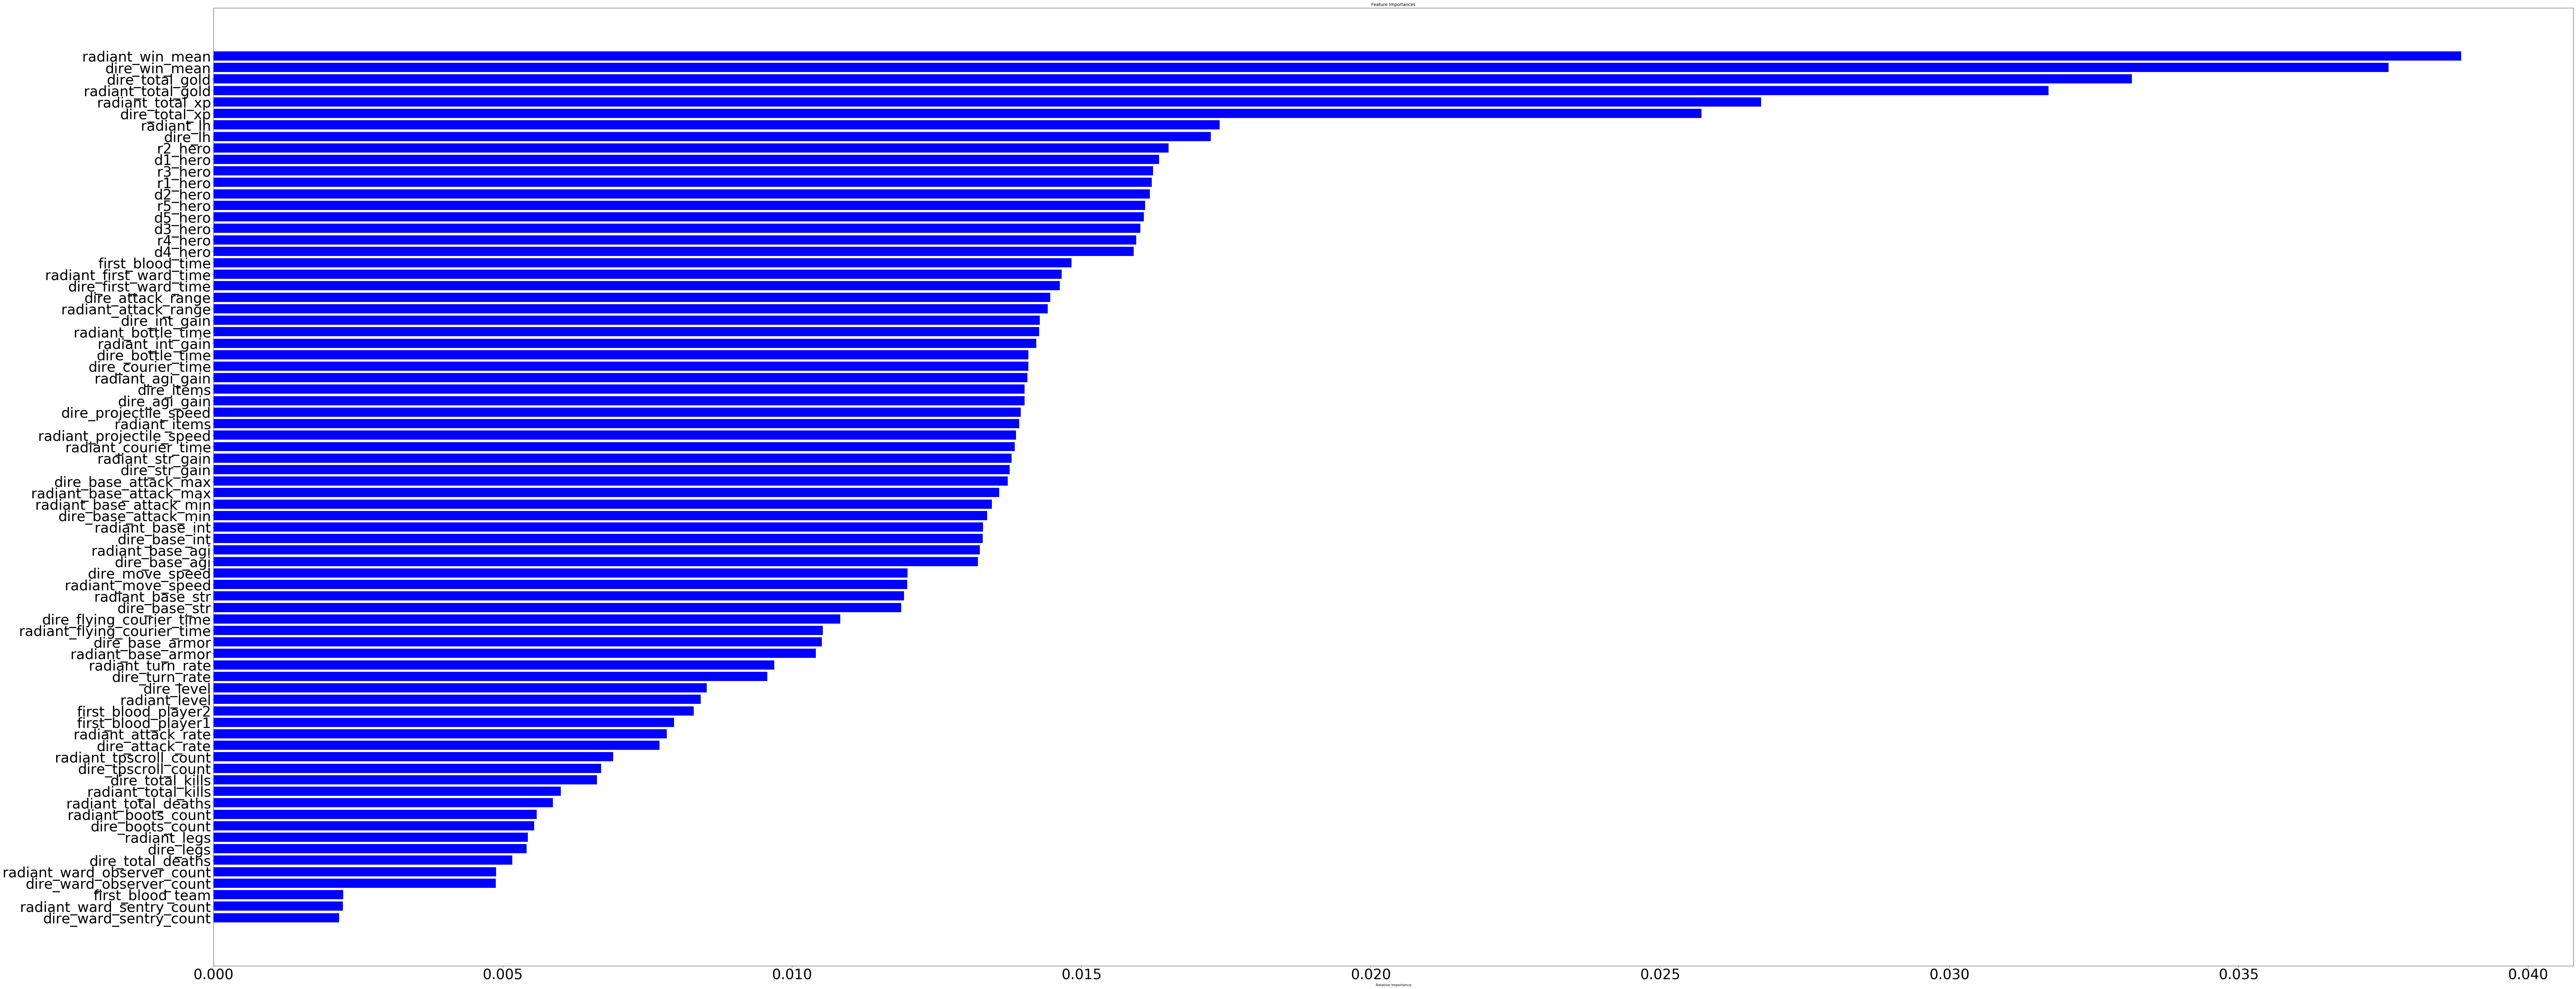

In [207]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(120, 50), dpi=80, facecolor='w', edgecolor='k')

import matplotlib
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40) 

importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [208]:
importances

array([0.01621685, 0.01650881, 0.01623803, 0.01594574, 0.0160985 ,
       0.0163419 , 0.01618527, 0.01601914, 0.01590091, 0.01607729,
       0.0148264 , 0.00224162, 0.00795823, 0.00829917, 0.0142714 ,
       0.01384892, 0.01052866, 0.00690752, 0.00558421, 0.00488184,
       0.00223408, 0.01465748, 0.03171494, 0.02674894, 0.00600289,
       0.00586476, 0.01408128, 0.01408121, 0.01083045, 0.00669881,
       0.0055413 , 0.00487792, 0.00217139, 0.01462808, 0.03315672,
       0.02571609, 0.00662562, 0.00516539, 0.00841851, 0.00852198,
       0.01739151, 0.01723763, 0.01392615, 0.01401795, 0.01406553,
       0.01401582, 0.01441523, 0.01446195, 0.00783395, 0.00770655,
       0.01324395, 0.01321121, 0.01040783, 0.01051456, 0.01357879,
       0.01372774, 0.01345023, 0.01337053, 0.01330186, 0.01329582,
       0.01193384, 0.01188404, 0.01422032, 0.01428218, 0.00543228,
       0.00540884, 0.01198818, 0.0119934 , 0.01386999, 0.01394985,
       0.01379199, 0.01375925, 0.0096906 , 0.00956922, 0.03884

In [210]:
feature_imp = pd.Series(clf.feature_importances_,index=['r1_hero',
'r2_hero',
'r3_hero',
'r4_hero',
'r5_hero',
'd1_hero',
'd2_hero',
'd3_hero',
'd4_hero',
'd5_hero',
'first_blood_time',
'first_blood_team',
'first_blood_player1',
'first_blood_player2',
'radiant_bottle_time',
'radiant_courier_time',
'radiant_flying_courier_time',
'radiant_tpscroll_count',
'radiant_boots_count',
'radiant_ward_observer_count',
'radiant_ward_sentry_count',
'radiant_first_ward_time',
'radiant_total_gold',
'radiant_total_xp',
'radiant_total_kills',
'radiant_total_deaths',
'dire_bottle_time',
'dire_courier_time',
'dire_flying_courier_time',
'dire_tpscroll_count',
'dire_boots_count',
'dire_ward_observer_count',
'dire_ward_sentry_count',
'dire_first_ward_time',
'dire_total_gold',
'dire_total_xp',
'dire_total_kills',
'dire_total_deaths',
'radiant_level',
'dire_level',
'radiant_lh',
'dire_lh',
'radiant_items',
'dire_items',
'radiant_agi_gain',
'dire_agi_gain',
'radiant_attack_range',
'dire_attack_range',
'radiant_attack_rate',
'dire_attack_rate',
'radiant_base_agi',
'dire_base_agi',
'radiant_base_armor',
'dire_base_armor',
'radiant_base_attack_max',
'dire_base_attack_max',
'radiant_base_attack_min',
'dire_base_attack_min',
'radiant_base_int',
'dire_base_int',
'radiant_base_str',
'dire_base_str',
'radiant_int_gain',
'dire_int_gain',
'radiant_legs',
'dire_legs',
'radiant_move_speed',
'dire_move_speed',
'radiant_projectile_speed',
'dire_projectile_speed',
'radiant_str_gain',
'dire_str_gain',
'radiant_turn_rate',
'dire_turn_rate',
'radiant_win_mean',
'dire_win_mean']).sort_values(ascending=False)
feature_imp

radiant_win_mean               0.038844
dire_win_mean                  0.037589
dire_total_gold                0.033157
radiant_total_gold             0.031715
radiant_total_xp               0.026749
dire_total_xp                  0.025716
radiant_lh                     0.017392
dire_lh                        0.017238
r2_hero                        0.016509
d1_hero                        0.016342
r3_hero                        0.016238
r1_hero                        0.016217
d2_hero                        0.016185
r5_hero                        0.016098
d5_hero                        0.016077
d3_hero                        0.016019
r4_hero                        0.015946
d4_hero                        0.015901
first_blood_time               0.014826
radiant_first_ward_time        0.014657
dire_first_ward_time           0.014628
dire_attack_range              0.014462
radiant_attack_range           0.014415
dire_int_gain                  0.014282
radiant_bottle_time            0.014271
